In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

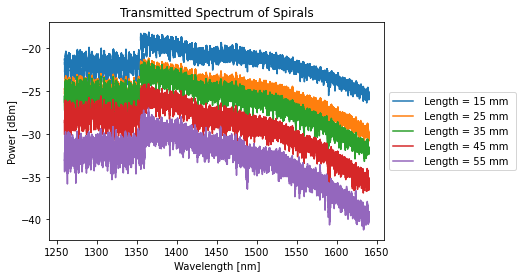

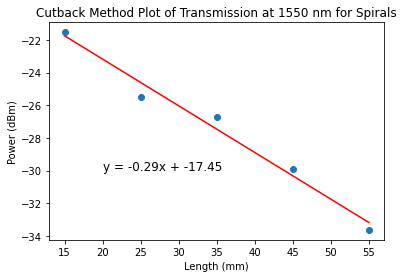

linear losses = -0.29 dB/mm
setup linear losses = -17.45 dB


In [61]:
file_names = ['spiral15.csv', 'spiral25.csv', 'spiral35.csv', 'spiral45.csv', 'spiral55.csv']
spiral_lengths = [15, 25, 35, 45, 55]

x_values = np.array([])
y_values = []

all_wl = []
all_powers = []

for i, file_name in enumerate(file_names):
    # Import the da
    data = pd.read_csv(file_name, header=None, names=['wavelength', 'channel_1'], skiprows=1)
    
    wavelength = data['wavelength'].values
    powers = data['channel_1'].values
    
    all_wl.append(wavelength)
    all_powers.append(powers)
    
    data['wavelength'] = data['wavelength'].astype(float)
    data['channel_1'] = data['channel_1'].astype(float)
    data['power_mW'] = np.power(10, data['channel_1']/10)
    
     # find the row that contains the value you are looking for in column 1
    row = data.loc[data['wavelength'] == int(1550)]

    # extract the value from the 'power_mW' column of that row
    value = row['channel_1'].values[0]

    # add the value to the list of y coordinates
    y_values.append(value)

    # add the corresponding length value to the list of x coordinates
    x_values = np.append(x_values, spiral_lengths[i])
    
# Plot the transmitted spectrum of the spirals 

plt.xlabel("Wavelength [nm]")
plt.ylabel("Power [dBm]")
plt.title("Transmitted Spectrum of Spirals")

for i in range(len(all_powers)):
    plt.plot(all_wl[0], all_powers[i], label =" Length = {} mm ".format(spiral_lengths[i]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)
plt.show()

# Calculate the slope and y-intercept of the trendline
slope, intercept = np.polyfit(x_values, y_values, 1)

# create a scatter plot with the extracted values and trendline
plt.scatter(x_values, y_values)
trendline = slope * x_values + intercept

plt.plot(x_values, trendline, color='red')
plt.text(20, -30, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
plt.xlabel('Length (mm)')
plt.ylabel('Power (dBm)')
plt.title(f'Cutback Method Plot of Transmission at 1550 nm for Spirals')

# Save the plot as a PNG file to your drive, make sure to choose the correct directory:
#plt.savefig('savefilepath_plot')

plt.show() 
    
print('linear losses = {:.2f} dB/mm'.format(slope))
print('setup linear losses = {:.2f} dB'.format(intercept))


